In [73]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import layers
from sklearn.metrics import accuracy_score

## Loading the dataset

In [74]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

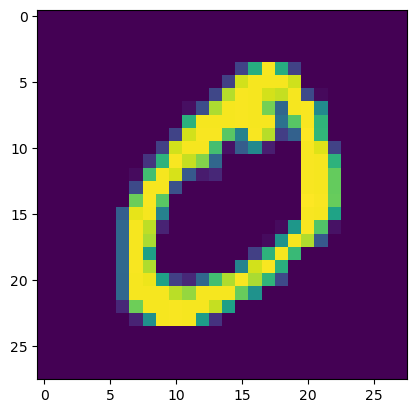

In [75]:
plt.imshow(X_train[1])
plt.show()

In [76]:
# Checking shape of the dataset
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

We can see that image dimension is (28x28)

In [77]:
#checking unique labels 
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Preparing Data

In [78]:
nums=10

y_train = keras.utils.to_categorical(y_train, nums)
y_test = keras.utils.to_categorical(y_test, nums)


In [79]:
train_images = X_train.reshape(X_train.shape[0], 28, 28, 1)
test_images = X_test.reshape(X_test.shape[0], 28, 28, 1)

def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

X_train = preprocess_images(train_images)
X_test = preprocess_images(test_images)

In [80]:
# Lets check dimensionalities
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [81]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Building the model

In [83]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

In [84]:
# Compiling the model
import tensorflow as tf
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [85]:
y_train.shape

(60000, 10)

In [86]:
#Training the model
batch_size = 128
epochs = 5

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 38s 89ms/step - loss: 0.2821 - accuracy: 0.9139 - val_loss: 0.0597 - val_accuracy: 0.9830
Epoch 2/5
422/422 [==============================] - 43s 102ms/step - loss: 0.1006 - accuracy: 0.9706 - val_loss: 0.0457 - val_accuracy: 0.9887
Epoch 3/5
422/422 [==============================] - 42s 100ms/step - loss: 0.0747 - accuracy: 0.9771 - val_loss: 0.0388 - val_accuracy: 0.9890
Epoch 4/5
422/422 [==============================] - 50s 117ms/step - loss: 0.0622 - accuracy: 0.9809 - val_loss: 0.0352 - val_accuracy: 0.9897
Epoch 5/5
422/422 [==============================] - 66s 157ms/step - loss: 0.0522 - accuracy: 0.9836 - val_loss: 0.0370 - val_accuracy: 0.9905


In [87]:
y_pred = model.predict(X_test)
y_pred.shape

313/313 [==============================] - 3s 10ms/step


(10000, 10)

In [88]:
print(np.argmax(y_pred[0]),y_test[0])

7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [89]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03185001388192177
Test accuracy: 0.9891999959945679


In [90]:
model.save("mnist.h5")